# Analiziranje knjig

V tej datoteki analiziramo podatke, povezane z osebami iz fantazijske zbirke knjig "Malazan Book of the Fallen" avtorja Stevena Eriksona in zbirke "Novels of the Malazan Empire" avtorja Ian C. Esslemonta. V prvi zbirki je 10 knjig, v drugi pa 6.

In [40]:
import os
import pandas as pd

directory_obdelani = 'podatki-obdelani'
csv_osebe = 'osebe.csv'
csv_knjige = 'knjige.csv'
#količina izpisanih vrstic
pd.set_option("display.max_rows", 12)
# izberemo interaktivni "notebook" stil risanja

path_osebe = os.path.join(directory_obdelani, csv_osebe)
osebe = pd.read_csv(path_osebe)
osebe.index += 1

path_knjige = os.path.join(directory_obdelani, csv_knjige)
knjige = pd.read_csv(path_knjige)
knjige.index += 1

## 1. Osnovne informacije

### 1.1 Razpredelnica - knjige

Tu imamo razpredelnico, iz katere pridobivamo podatke za nadalnje analiziranje. V njej imamo polna imena knjig in njihove kratice, ki se uporabljajo v prikazu podatkov. Podatke za analizo jemljemo tudi iz razpredelnice za osebe.

In [41]:
knjige

,ime,kratica
1,Gardens of the Moon,GotM
2,Deadhouse Gates,DG
3,Memories of Ice,MoI
4,House of Chains,HoC
5,Midnight Tides,MT
...,...,...
12,Return of the Crimson Guard,RotCG
13,Stonewielder,SW
14,Blood and Bone,BB
15,Orb Sceptre Throne,OST


## 2. Tabele

### 2.1 Pojavitve po knjigi

Tu je razvidno, koliko oseb se pojavi v določeni knjigi.

In [42]:
knjige_pojavitve = {}
for j in knjige['kratica']:
    knjige_pojavitve[j] = 0
    for k in osebe['pojavljanje']:
        if str(j) in str(k):
            knjige_pojavitve[j] += 1

knjige_ = {'knjige':list(knjige_pojavitve.keys()), 'pojavitve':list(knjige_pojavitve.values())}
knjige_pd = pd.DataFrame.from_dict(knjige_)
knjige_pd = knjige_pd.set_index(['knjige'])
knjige_pd

,pojavitve
knjige,
GotM,88
DG,92
MoI,118
HoC,135
MT,90
...,...
RotCG,7
SW,5
BB,2


### 2.2 Najbolj pogoste kombinacije pojavitev v dveh knjigah

Seznam števila oseb, ki se pojavijo v kombinaciji dveh knjig.

In [43]:
#seznam, koliko oseb je nastopalo v dveh specifičnih knjigah
pari_ponovitev = {}
for i in knjige['kratica']:
    for j in knjige['kratica']:
        if i == j or str(j + ', ' + i) in pari_ponovitev.keys():
            continue
        pari_ponovitev[i + ', ' + j] = 0
        for k in osebe['pojavljanje']:
            if str(i) in str(k) and str(j) in str(k):
                pari_ponovitev[i + ', ' + j] += 1
       
pari_ponovitev_ = {'par':list(pari_ponovitev.keys()), 'pojavitve':list(pari_ponovitev.values())}
pari_ponovitev_pd = pd.DataFrame.from_dict(pari_ponovitev_)
pari_ponovitev_pd = pari_ponovitev_pd.set_index(['par'])
pari_ponovitev_pd

,pojavitve
par,
"GotM, DG",19
"GotM, MoI",26
"GotM, HoC",16
"GotM, MT",0
"GotM, BH",17
...,...
"SW, OST",1
"SW, As",1
"BB, OST",0


In [44]:
pari_ponovitev_pd_top10 = pari_ponovitev_pd.sort_values('pojavitve', ascending=False).head(10)
pari_ponovitev_pd_top10

,pojavitve
par,
"DoD, CG",149
"RG, DoD",106
"RG, CG",88
"HoC, BH",73
"BH, CG",69
"BH, RG",61
"BH, DoD",57
"DG, HoC",48
"HoC, CG",48


### 2.3 Najbolj pogosta začetnica v knjigi

Iz podatkov imamo pridobljeno največje število oseb, ki se začnejo na isto črko ter katera ta črka je.

In [45]:
osebe_v_knjigi = {}
for i in knjige['kratica']:
    osebe_v_knjigi[i] = []
    for index, row in osebe.iterrows():
        if i in str(row['pojavljanje']):
            osebe_v_knjigi[i].append(row['ime'])
print(osebe_v_knjigi)

začetnice_v_knjigi = {'knjiga': [], 'črka': [], 'ponovitev': []}
for i in osebe_v_knjigi.keys():
    count = 0
    letter = ''
    x = 0
    for j in "ABCDEFGHIJKLMNOPRSTUVWXYZ":
        for k in osebe_v_knjigi[i]:
            if j == k[0]:
                x += 1
        if x > count:
            count = x
            letter = j
        x = 0
    začetnice_v_knjigi['knjiga'].append(i)
    začetnice_v_knjigi['črka'].append(letter)
    začetnice_v_knjigi['ponovitev'].append(count)
print(začetnice_v_knjigi)
začetnice_v_knjigi_pd = pd.DataFrame.from_dict(začetnice_v_knjigi)
začetnice_v_knjigi_pd = začetnice_v_knjigi_pd.set_index(['knjiga', 'črka'])
začetnice_v_knjigi_pd

{'GotM': ["A'Karonys", 'Anomander Rake', 'Antsy', 'Apsalar', 'Baran', 'Baruk', 'Bellurdan Skullcrusher', 'Ben Adaephon Delat', 'Blind', 'Blues', 'Caladan Brood', 'Calot', "Challice D'Arle", 'Chert', 'Circle Breaker', 'Coll', 'Cotillion', 'Cowl', 'Crokus Younghand', 'Crone', 'Derudan', 'Doan', 'Dujek Onearm', "Estraysian D'Arle", 'Felisin Paran', 'Fiddler', 'Fingers', 'Gamet', 'Ganoes Stabro Paran', 'Ganrod', 'Gear', 'Gorlas Vidikas', 'Hairlock', 'Hedge', 'Horult', 'Icarium', 'Irilta', 'Jorrick Sharplance', "K'azz D'Avore", "K'rul", 'Kalam Mekhar', 'Kallor', 'Kig Aven', 'Korlat', 'Kruppe', 'Krute of Talient', 'Laseen', 'Lim', 'Logros', 'Lorn', 'Mallet', 'Mammot', 'Mappo Runt', 'Meese', 'Moby', 'Murillio', 'Nightchill', 'Ocelot', "Onos T'oolan", 'Orfantal', 'Parald', 'Picker', 'Pran Chole', 'Raest', 'Rallick Nom', 'Rood', 'Scurve', 'Serrat', 'Shadowthrone', 'Shan', 'Silanah', 'Simtal', 'Stillis', 'Sulty', 'Talo Krafar', 'Tattersail', 'Tavore Paran', 'Tayschrenn', 'Tholis', 'Toc the Elder

,,ponovitev
knjiga,črka,
GotM,T,11
DG,B,11
MoI,R,14
HoC,B,17
MT,S,10
...,...,...
RotCG,K,4
SW,I,2
BB,B,1


## 3. Grafi

### 3.1 Graf pojavitve po knjigi

Spodnji graf najbolje ponazarja, kako nepopolna je spletna stran, iz katere jemljemo podatke. Zaradi tega je tudi težko komentirati, kaj ti podatki sploh ponazarjajo.

<Axes: title={'center': 'Število oseb, ki se pojavijo v knjigi'}, xlabel='knjiga', ylabel='število oseb'>

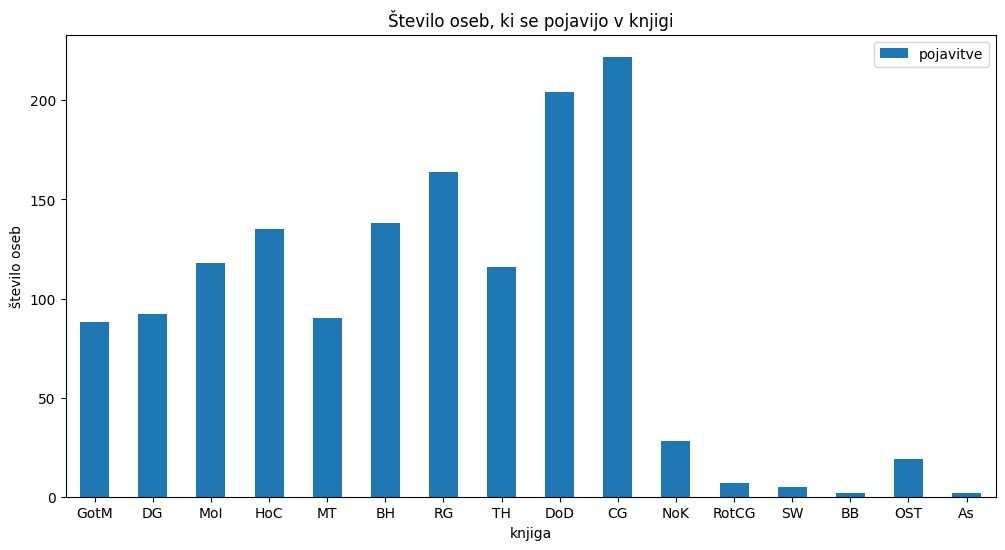

In [46]:
knjige_pd.plot.bar(xlabel='knjiga', ylabel='število oseb', figsize=(12, 6), title='Število oseb, ki se pojavijo v knjigi', rot=0)

### 3.2 Graf najbolj pogoste kombinacije pojavitev v dveh knjigah

Graf najbolj pogoste kombinacije pojavitev v dveh knjigah nam pokaže, da se večina oseb pojavi v dvojici knjig 'Dust of Dreams' in 'The Crippled God'. Razlog za to je, da je dogajanje v teh dveh knjigah najbolj povezano.

<Axes: title={'center': 'Najbolj pogoste kombinacije pojavitev v dveh knjigah'}, xlabel='knjigi', ylabel='število oseb'>

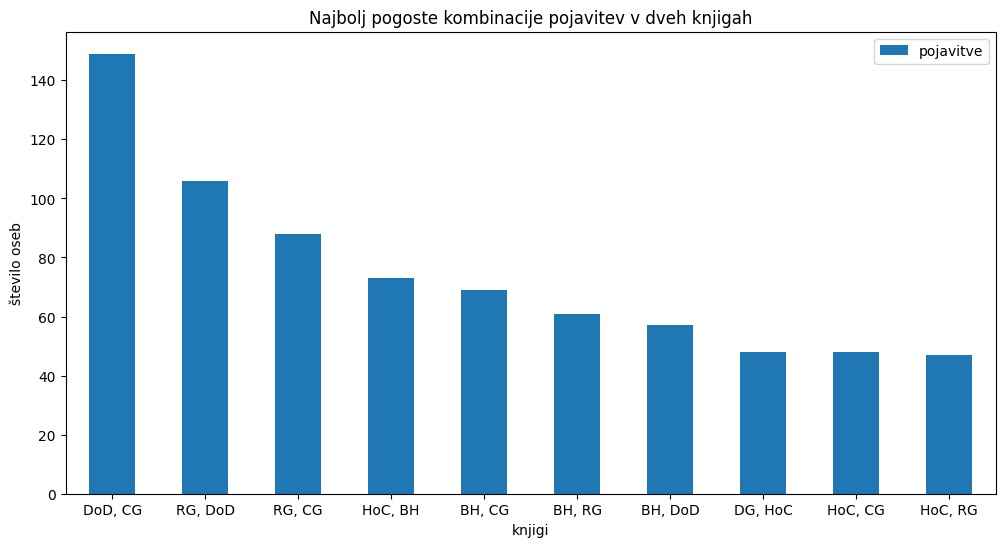

In [47]:
pari_ponovitev_pd_top10.plot.bar(xlabel='knjigi', ylabel='število oseb', figsize=(12, 6), title='Najbolj pogoste kombinacije pojavitev v dveh knjigah', rot=0)

### 3.2 Graf najbolj pogoste začetnice v knjigi

Predstavljeni so nadvse zanimivi podatki o tem, katera začetnica je v določeni knjigi najpogostejša.

<Axes: title={'center': 'Najbolj pogosta začetnica v knjigi'}, xlabel='knjiga, začetnica', ylabel='število oseb'>

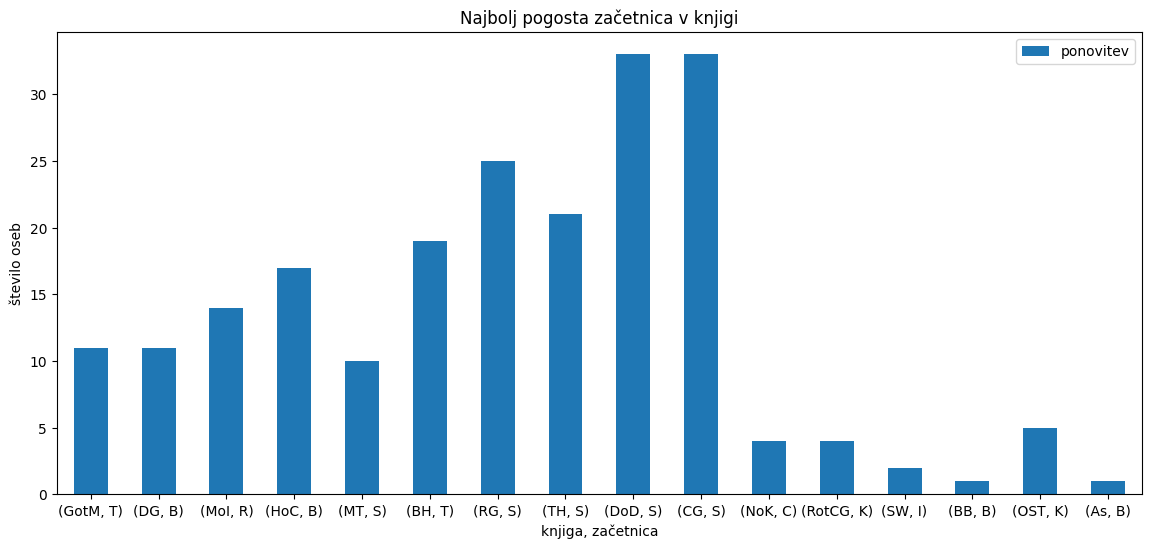

In [48]:
začetnice_v_knjigi_pd.plot.bar(xlabel='knjiga, začetnica', ylabel='število oseb', figsize=(14, 6), title='Najbolj pogosta začetnica v knjigi', rot=0)